In [1]:
import pandas as pd

####load the titanic dataset
df = pd.read_csv(r"C:\Users\user\Downloads\Microsoft_Stock.csv")

In [3]:
df.head(20)

,Date,Open,High,Low,Close,Volume
0,4/1/2015 16:00:00,40.60,40.76,40.31,40.72,36865322
1,4/2/2015 16:00:00,40.66,40.74,40.12,40.29,37487476
2,4/6/2015 16:00:00,40.34,41.78,40.18,41.55,39223692
3,4/7/2015 16:00:00,41.61,41.91,41.31,41.53,28809375
4,4/8/2015 16:00:00,41.48,41.69,41.04,41.42,24753438
5,4/9/2015 16:00:00,41.25,41.62,41.25,41.48,25723861
6,4/10/2015 16:00:00,41.63,41.95,41.41,41.72,28022002
7,4/13/2015 16:00:00,41.40,42.06,41.39,41.76,30276692
8,4/14/2015 16:00:00,41.80,42.03,41.39,41.65,24244382
9,4/15/2015 16:00:00,41.76,42.46,41.68,42.26,27343581


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1511 entries, 0 to 1510
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    1511 non-null   object 
 1   Open    1511 non-null   float64
 2   High    1511 non-null   float64
 3   Low     1511 non-null   float64
 4   Close   1511 non-null   float64
 5   Volume  1511 non-null   int64  
dtypes: float64(4), int64(1), object(1)
memory usage: 71.0+ KB


In [7]:
df.describe(include='all')

,Date,Open,High,Low,Close,Volume
count,1511,1511.000000,1511.000000,1511.000000,1511.000000,1.511000e+03
unique,1511,NaN,NaN,NaN,NaN,NaN
top,4/1/2015 16:00:00,NaN,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,NaN,NaN,NaN
mean,NaN,107.385976,108.437472,106.294533,107.422091,3.019863e+07
std,NaN,56.691333,57.382276,55.977155,56.702299,1.425266e+07
min,NaN,40.340000,40.740000,39.720000,40.290000,1.016120e+05
25%,NaN,57.860000,58.060000,57.420000,57.855000,2.136213e+07
50%,NaN,93.990000,95.100000,92.920000,93.860000,2.662962e+07
75%,NaN,139.440000,140.325000,137.825000,138.965000,3.431962e+07


In [9]:
df['Date'] = pd.to_datetime(df['Date'])

In [11]:
# Set it as index
df.set_index('Date',inplace = True)

In [14]:
# Sort by date just in case
df.sort_index(inplace=True)

In [16]:
df.head()

,Open,High,Low,Close,Volume
Date,,,,,
2015-04-01 16:00:00,40.60,40.76,40.31,40.72,36865322
2015-04-02 16:00:00,40.66,40.74,40.12,40.29,37487476
2015-04-06 16:00:00,40.34,41.78,40.18,41.55,39223692
2015-04-07 16:00:00,41.61,41.91,41.31,41.53,28809375
2015-04-08 16:00:00,41.48,41.69,41.04,41.42,24753438


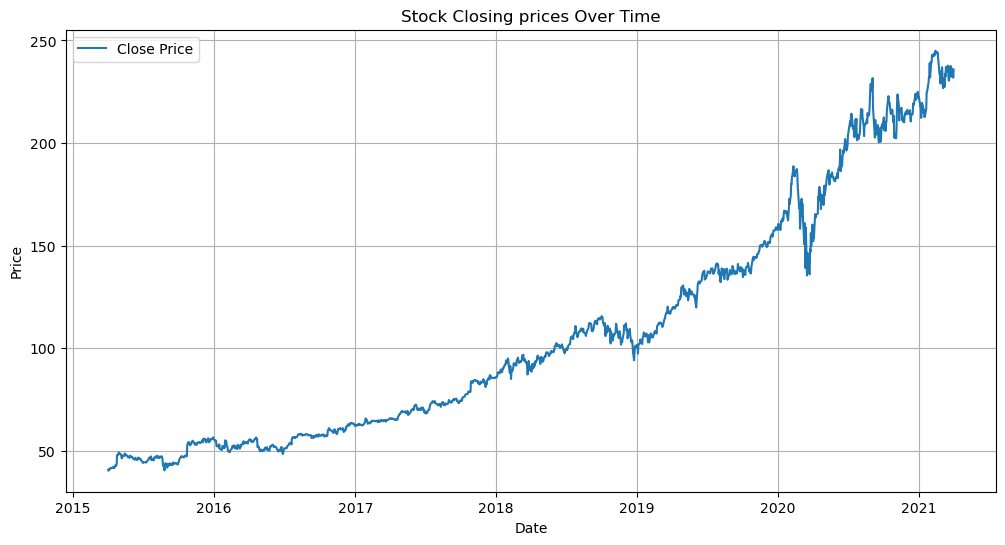

In [22]:
import matplotlib.pyplot as plt 
plt.figure(figsize=(12,6))
plt.plot(df['Close'],label = 'Close Price')
plt.title("Stock Closing prices Over Time")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()
plt.grid(True)
plt.show()

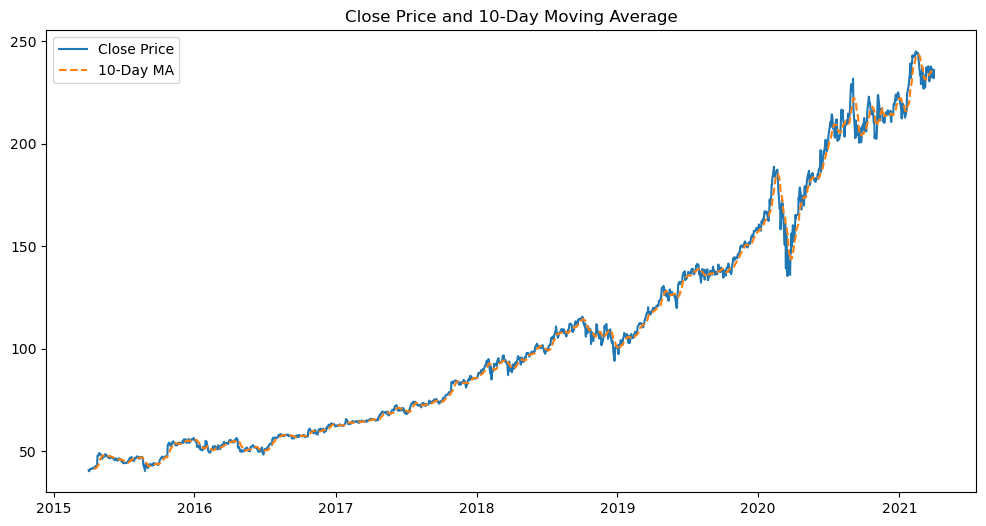

In [24]:
# Add 10-day moving average
df['MA_10'] = df['Close'].rolling(window=10).mean()

# Plot
plt.figure(figsize=(12, 6))
plt.plot(df['Close'], label='Close Price')
plt.plot(df['MA_10'], label='10-Day MA', linestyle='--')
plt.legend()
plt.title("Close Price and 10-Day Moving Average")
plt.show()

In [26]:
import pandas as pd

# Price change
df['Price_Change'] = df['Close'].pct_change()

# Volatility (rolling std dev of returns)
df['Volatility'] = df['Price_Change'].rolling(window=5).std()

# Moving averages
df['MA_10'] = df['Close'].rolling(window=10).mean()
df['MA_20'] = df['Close'].rolling(window=20).mean()

# Daily range
df['Range'] = df['High'] - df['Low']

# Relative volume (normalized)
df['Volume_Change'] = df['Volume'].pct_change()

# Drop initial NA rows
df.dropna(inplace=True)

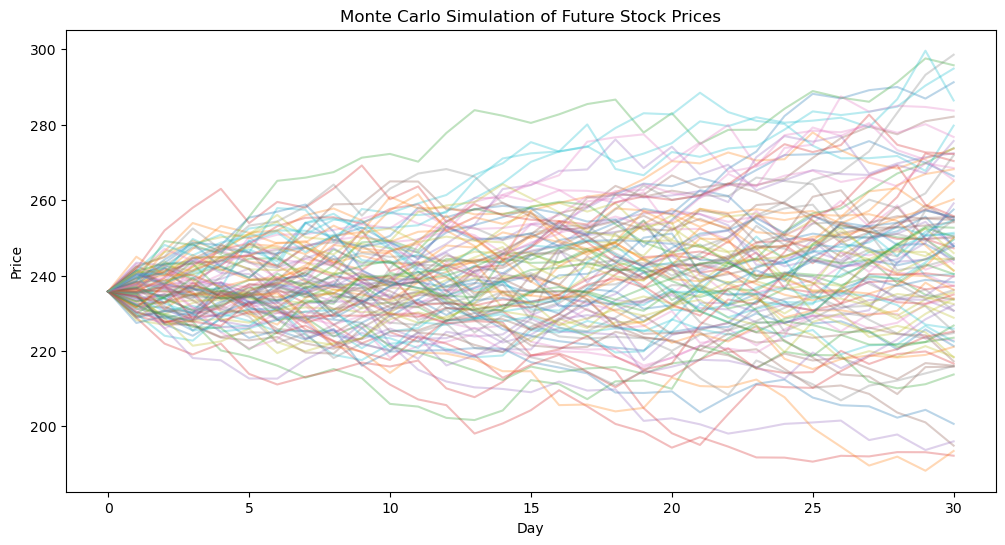

In [34]:
####MONTE CARLO SIMULATIONS### VERY IMPORTANT 
import numpy as np
import matplotlib.pyplot as plt

# Settings
num_simulations = 100
num_days = 30
last_price = df['Close'].iloc[-1]
daily_return_mean = df['Price_Change'].mean()
daily_return_std = df['Price_Change'].std()

simulations = []

for i in range(num_simulations):
    prices = [last_price]
    for d in range(num_days):
        price = prices[-1] * (1 + np.random.normal(daily_return_mean, daily_return_std))
        prices.append(price)
    simulations.append(prices)

# Plot
plt.figure(figsize=(12, 6))
for sim in simulations:
    plt.plot(sim, alpha=0.3)
plt.title("Monte Carlo Simulation of Future Stock Prices")
plt.xlabel("Day")
plt.ylabel("Price")
plt.show()

In [36]:
###create target column 
df['Target'] = (df['Close'].shift(-1)>df['Close']).astype(int)

In [38]:
from sklearn.model_selection import train_test_split

features = ['Open', 'High', 'Low', 'Close', 'Volume', 'Price_Change', 'Volatility', 'MA_10', 'MA_20', 'Range', 'Volume_Change']
X = df[features]
y = df['Target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=False)

In [40]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix

models = {
    'LogisticRegression': LogisticRegression(max_iter=1000),
    'RandomForest': RandomForestClassifier(),
    'XGBoost': XGBClassifier(use_label_encoder=False, eval_metric='logloss')
}

for name, model in models.items():
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    print(f"\n{name}:\n")
    print(confusion_matrix(y_test, preds))
    print(classification_report(y_test, preds))


LogisticRegression:

[[  0 199]
 [  0 249]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       199
           1       0.56      1.00      0.71       249

    accuracy                           0.56       448
   macro avg       0.28      0.50      0.36       448
weighted avg       0.31      0.56      0.40       448



C:\Users\user\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\user\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\user\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))



RandomForest:

[[ 34 165]
 [ 59 190]]
              precision    recall  f1-score   support

           0       0.37      0.17      0.23       199
           1       0.54      0.76      0.63       249

    accuracy                           0.50       448
   macro avg       0.45      0.47      0.43       448
weighted avg       0.46      0.50      0.45       448


XGBoost:

[[ 21 178]
 [ 22 227]]
              precision    recall  f1-score   support

           0       0.49      0.11      0.17       199
           1       0.56      0.91      0.69       249

    accuracy                           0.55       448
   macro avg       0.52      0.51      0.43       448
weighted avg       0.53      0.55      0.46       448



C:\Users\user\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [03:52:50] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


In [42]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier

# Feature engineering (απλό για αρχή)
df['Price_Change'] = df['Close'].pct_change()
df['Target'] = (df['Close'].shift(-1) > df['Close']).astype(int)
df.dropna(inplace=True)

features = ['Open', 'High', 'Low', 'Close', 'Volume', 'Price_Change']
X = df[features]
y = df['Target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=False)

In [44]:
from sklearn.model_selection import GridSearchCV

pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('clf', RandomForestClassifier())
])

param_grid = {
    'clf__n_estimators': [50, 100],
    'clf__max_depth': [3, 5, None],
    'clf__min_samples_split': [2, 5]
}

grid = GridSearchCV(pipe, param_grid, cv=5, scoring='accuracy')
grid.fit(X_train, y_train)

print("Best Params:", grid.best_params_)
preds = grid.predict(X_test)
print(classification_report(y_test, preds))

Best Params: {'clf__max_depth': 3, 'clf__min_samples_split': 5, 'clf__n_estimators': 100}
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       199
           1       0.56      1.00      0.71       249

    accuracy                           0.56       448
   macro avg       0.28      0.50      0.36       448
weighted avg       0.31      0.56      0.40       448



C:\Users\user\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\user\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\user\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [46]:
pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('clf', LogisticRegression(max_iter=1000))  # Ή XGBClassifier()
])

In [48]:
from imblearn.pipeline import Pipeline as ImbPipeline
from imblearn.over_sampling import SMOTE
from xgboost import XGBClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report


X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=False, test_size=0.3)

# Pipeline
pipeline = ImbPipeline(steps=[
    ('scaler', StandardScaler()),
    ('smote', SMOTE()),
    ('model', XGBClassifier(use_label_encoder=False, eval_metric='logloss'))
])

pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.41      0.32      0.36       199
           1       0.54      0.63      0.58       249

    accuracy                           0.49       448
   macro avg       0.47      0.47      0.47       448
weighted avg       0.48      0.49      0.48       448



C:\Users\user\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [03:58:38] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
